- Aluno: Victor Afonso Bauler

# Enunciado - Trabalho 1

<div align="center">

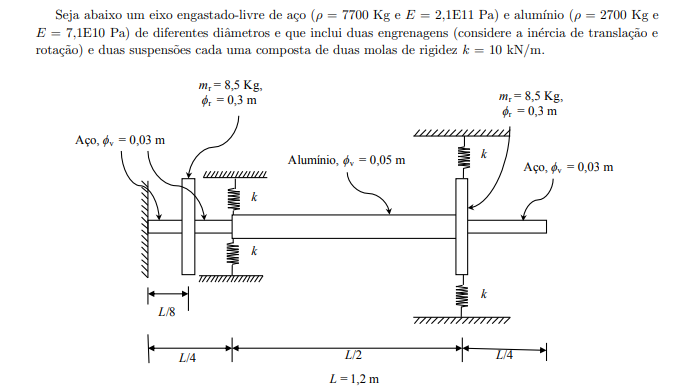

</div>

# Questões

<div align="center">

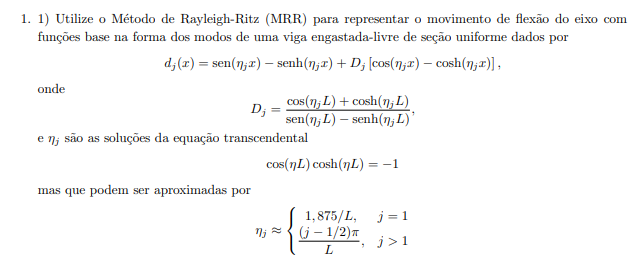


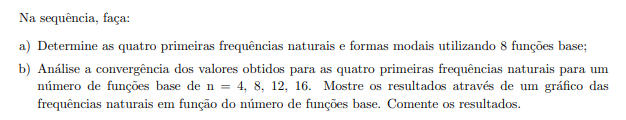

</div>

<div align="center">

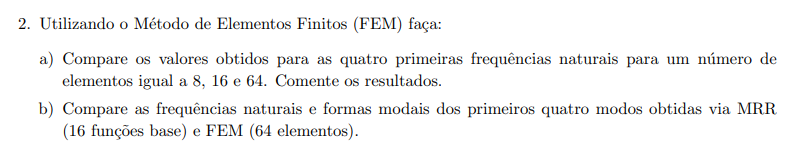

</div>

## Resolução

### Método de Rayleigh-Ritz (MRR)

Para a solução do problema com o Método de Rayleigh-Ritz (MRR), serão adotados os seguintes passos:

1. Obtenção da matriz de rigidez e da matriz de massa, a partir das equações de energia, usando as funções de base previamente definidas;
2. Solução da equação do movimento via método modal;
3. Substituição dos coeficientes obtidos na equação do movimento, para obtenção da solução aproximada.

#### 1. Obtenção das matrizes de rigidez e massa (MRR)

O Método de Rayleigh-Ritz aproxima a solução de $v(x,t)$ através de uma expansão na forma: $$v(x,t)=\sum _{j=1}^{N} d_{j}(x)q_j(t)$$
Em que: 
- $d_j(x)$ são as funções de base, previamente definidas;
- $q_j(t)$ são os coeficientes a serem determinados.

Dessa forma o MRR (Método de Rayleigh-Ritz) transforma um problema contínuo em um problema discreto com N graus de liberdade.

O número finito de GL (graus de liberdade) permite a utilização das equações de Lagrange: 
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q}_j}\right)+ \frac{\partial D}{\partial \dot{q}_j}+\frac{\partial U}{\partial q_j}=Q_j$$
Em que:
- $T$ é a energia cinética;
- $D$ é a energia dissipada;
- $U$ é a energia potencial;
- $Q_j$ é a força externa aplicada no grau de liberdade $j$;
- $q_j$ são as coordenadas generalizadas.

Ou pode-se utilizar diretamente as definições de energias na forma matricial:
$$T=\frac{1}{2}\{\dot{q} \}^T[M]\{\dot{q} \}$$
$$U=\frac{1}{2}\{q \}^T[K]\{q \}$$
$$\delta W=\{Q\}^T\{\delta q\}$$

Em que:
- $[M]$ é a matriz de massa;
- $[K]$ é a matriz de rigidez;
- $\{Q\}$ é o vetor de forças externas;
- $\delta W$ é o trabalho virtual.

##### Energia cinética

Como foi deduzido durante a disciplina, a energia cinética para uma viga em flexão é dada por:

$$T=\frac{1}{2}\int _{0}^{L} \rho A\left(\frac{\partial v}{\partial t}\right)^{2} dx$$

Além disso, a viga em questão possuí duas engrenagens, as quais possuem massa $m_r$ e momento polar de inércia $J$, localizadas em $\frac{L}{8}$ e $\frac{3L}{4}$. Dessa forma, segundo Petyt (2010), a energia cinética total é dada por:

$$T=\frac{1}{2}\int _{0}^{L} \rho A\left(\frac{\partial v}{\partial t}\right)^{2} dx + \frac{1}{2}m_r\left(\frac{\partial v(\frac{L}{8}, t)}{\partial t}\right)^{2} + \frac{1}{2}m_r\left(\frac{\partial v(\frac{3L}{4}, t)}{\partial t}\right)^{2} + \frac{1}{2}J\left(\frac{\partial^2 v(\frac{L}{8}, t)}{\partial x \partial t}\right)^{2} + \frac{1}{2}J\left(\frac{\partial^2 v(\frac{3L}{4}, t)}{\partial x \partial t}\right)^{2}$$

##### Energia potencial

Também foram feitas as deduções em aula de que a energia potencial é dada por:

$$U=\frac{1}{2}\int _{0}^{L} EI_z\left(\frac{\partial ^{2}v}{\partial x^{2}}\right)^{2} dx$$

A viga em questão possuí 4 molas, sendo elas conectadas em suspensão, de 2 a 2 (em $\frac{L}{4}$ e $\frac{3L}{4}$), com rigidez $k$. Dessa forma a energia potencial total é dada por:

$$U=\frac{1}{2}\int _{0}^{L} EI_z\left(\frac{\partial ^{2}v}{\partial x^{2}}\right)^{2} dx + \frac{1}{2}2k\left(v(\frac{L}{4}, t)\right)^{2} + \frac{1}{2}2k\left(v(\frac{3L}{4}, t)\right)^{2}$$

##### Trabalho Virtual

O trabalho virtual é dado por:

$$\delta W=\int _{0}^{L} F_y \delta v \ dx$$

Nesse caso, como não há forças externas, o trabalho virtual é nulo.

##### Matrizes de rigidez e massa

Substituindo a expansão de $v(x,t)$ nas equações de energia para obtenção das matrizes de rigidez e massa, tem-se:

$$M_{jk}=\int _{0}^{L} \rho A \ d_j(x)  d_k(x) \ dx + m_r d_j(x=\frac{L}{8}) d_k(x=\frac{L}{8}) + m_r d_j(x=\frac{3L}{4}) d_k(x=\frac{3L}{4}) + J d_j'(x=\frac{L}{8}) d_k'(x=\frac{L}{8})+ J d_j'(x=\frac{3L}{4}) d_k'(x=\frac{3L}{4})$$

$$K_{jk}=\int _{0}^{L} EI_z \ d_j^{''}(x)  d_k^{''}(x) \ dx + 2k \ d_j(x=\frac{L}{4}) d_k(x=\frac{L}{4}) + 2k \ d_j(x=\frac{3L}{4}) d_k(x=\frac{3L}{4}) $$

$$Q_j=\int _{0}^{L} F_y d_j(x) \ dx = 0$$

#### 2. Solução da equação do movimento via método modal (MRR)

Com as matrizes de rigidez e massa obtidas, é possível resolver a equação do movimento:

$$[M]\{\ddot{q}\}+[K]\{q\}=\{Q\}$$

Como não há forças externas temos que:

$$[M]\{\ddot{q}\}+[K]\{q\}=\{0\}$$

No caso de solução via método modal, o problema de Autovalor fica:

$$([K]-\omega^2[M])\{a\}=\{0\}$$

Tal que:
- $w_n^2$ são os autovalores;
- $a_n$ são os autovetores.

E as autofunções em termos de $v(x,t)$ são dadas por:

$$u_n(x)=\{d(x)\}^T\{a_n\}$$

#### Obtenção dos modos de vibração e análise de convergência

A seguir serão apresentadas as formas modais e frequências naturais obtidas utilizando 8 funções de base.

<div align="center">

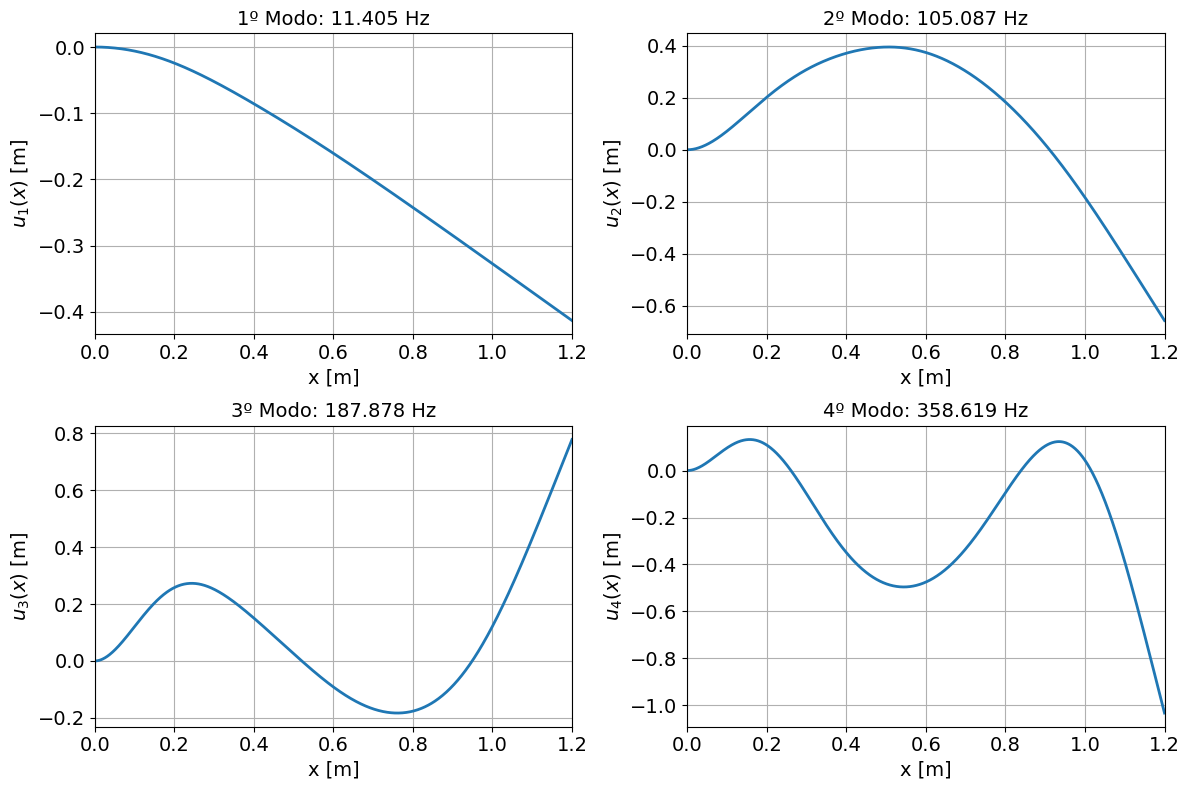

</div>

Em seguida é apresentado o gráfico de convergência das frequências naturais, nota-se que para as duas primeiras frequências naturais 4 funções de base já encontram uma
boa aproximação (considerando o resultado para 16 funções de base como referência), porém
para as terceira e quarta frequências essa quantidade já não representa uma boa aproximação.

<div align="center">

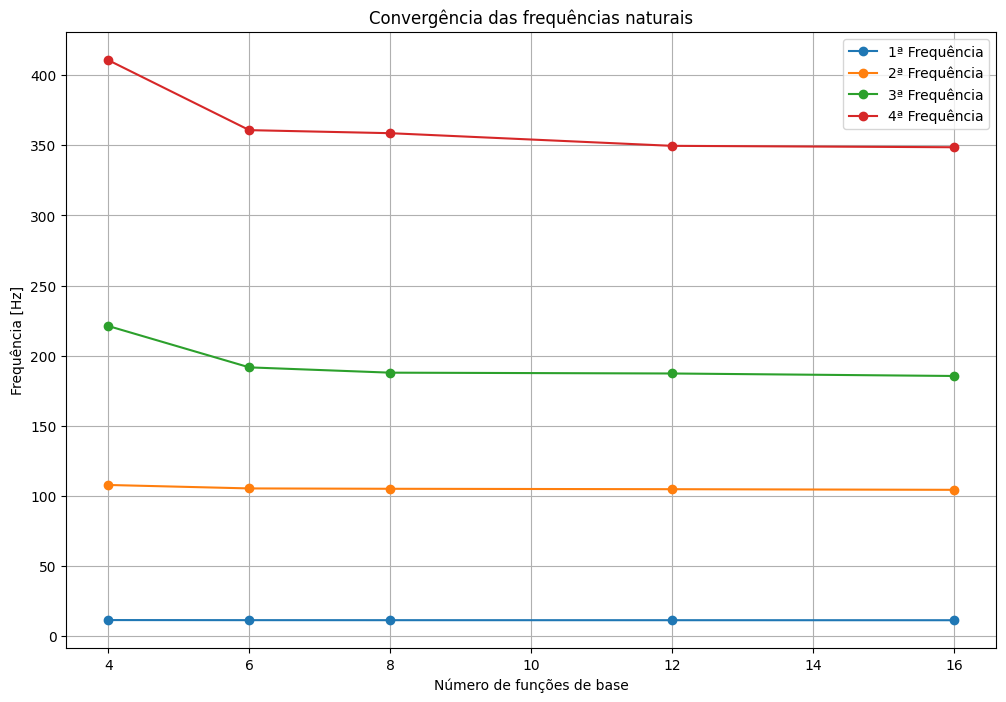

</div>

### Método de Elementos Finitos (FEM)

Para a solução do problema com o Método dos Elementos Finitos (FEM), serão adotados os seguintes passos:
1. Divide-se a estrutura em elementos, formando uma malha, que representa o problema em estudo em um sistema discreto;
2. Desse conjunto de elementos define-se um conjunto de pontos - chamados de nós - ao longo das bordas dos elementos, onde serão avaliados os parâmetros físicos;
3. Toma-se um conjunto de funções, chamadas de funções de forma, que atendem aos princípios do MRR, sendo que cada função fornece um valor unitário
para um determinado GL e zero para os demais;
4. Realiza-se a análise do problema tomando-se as funções de forma dentro dos elementos, similarmente ao que era feito no MRR para o sistema completo.


#### Funções de forma para elemento de viga em flexão

<div align='center'>

Elemento de viga em flexão

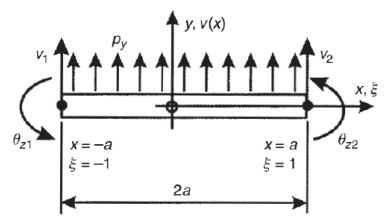

Fonte: Fahy and Gardonio (2007)
</div>

Como foi deduzido durante a disciplina, um elemento de viga com 2 nós e 4 GL pode ser representado por 4 funções de forma, as quais serão representadas por um polinômio de terceiro grau, que terá valor unitário em cada GL e zero nos demais. \
As funções de forma para o elemento de viga em flexão são agrupadas em um vetor $\eta(\xi)$:

$$\{\eta(\xi)\}=

\begin{bmatrix}
 \frac{1}{4}(2-3\xi+\xi^3)\\
 \frac{a}{4}(1-\xi-\xi^2+\xi^3)\\
 \frac{1}{4}(2+3\xi-\xi^3)\\
 \frac{a}{4}(-1-\xi+\xi^2+\xi^3) 
\end{bmatrix}

$$

#### Matrizes de rigidez e massa para elemento de viga em flexão

A partir do vetor de funções de forma, é possível obter as matrizes de rigidez e massa para o elemento de viga em flexão. \
A matriz de rigidez é obtida a partir da seguinte integral:

$$K_{e}=\int _{-1}^{1} \frac{E I_z}{a^3} \ (\eta^{''}(\xi))  (\eta^{''}(\xi))^T \ d\xi$$

A matriz de massa é obtida a partir da seguinte integral:

$$M_{e}=\int _{-1}^{1} \rho A a \ (\eta(\xi))  (\eta(\xi))^T \ d\xi$$

As contribuições das molas e das engrenagens são adicionadas no GL correspondente.

#### Obtenção das matrizes globais

A partir das matrizes de rigidez e massa para o elemento de viga em flexão, é possível obter as matrizes globais de rigidez e massa. \
Para isso, é necessário definir a matriz de conectividade, que relaciona os GL de cada elemento com os GL globais. \
A matriz de conectividade para o problema em estudo é dada por:

<div align="center">

| GL do Elemento (e)   |     Posição nas Matrizes Globais (Linha e Coluna)      |
|----------|:-------------:|
| $v_{1,e}$ |  $2e-1$ |
| $\theta_{z1,e}$ |    $2e$   |
| $v_{2,e}$ | $2e+1$ |
| $\theta_{z2,e}$ | $2e+2$ |

</div>

A partir da matriz de conectividade é possível executar o Processo de Montagem, que consiste em somar as contribuições de cada elemento para as matrizes globais. \
A partir das matrizes globais será possível resolver o problema de Autovalor, da mesma forma já relatada para o MRR.

#### Obtenção dos modos de vibração e análise de convergência

<div align="center">

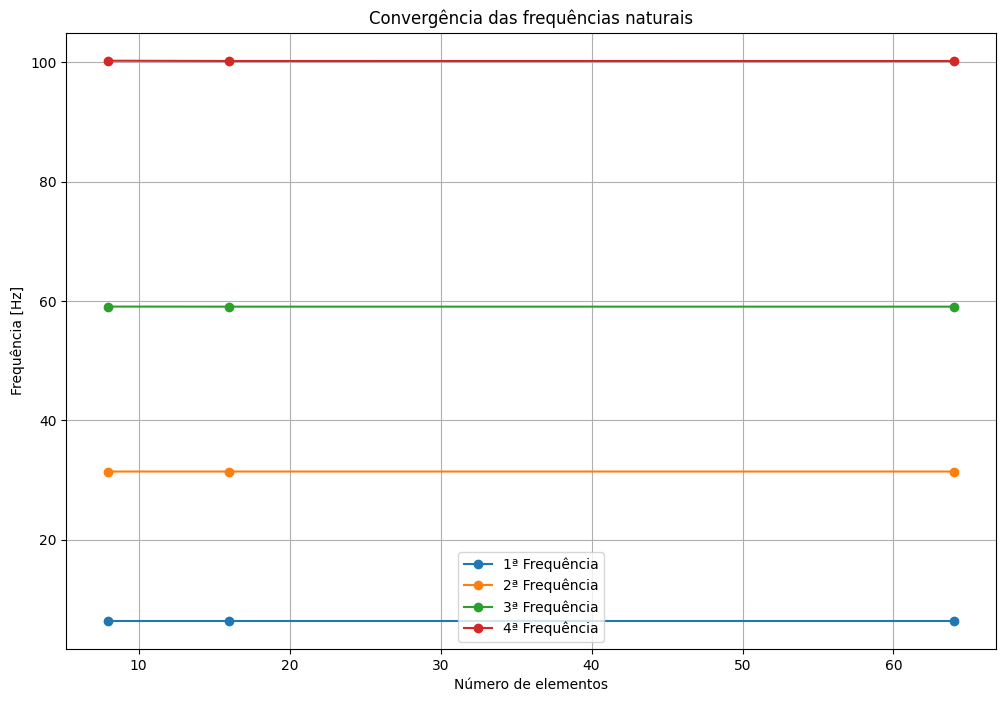

</div>

Nota-se que para o FEM a convergência é mais rápida, sendo possível utilizar um número menor de elementos e já obter um bom resultado. \
No entanto, houve uma divergência das frequências obtidas pelo MRR, o autor buscou identificar a causa dessa divergência, revisando os códigos de implementação, mas não foi possível identificar o problema, uma possível explicação seria um problema na resolução das integrais simbolicas para obtenção das matrizes de massa e rigidez no MRR, pois as funções de base são bem complexas e o processo teve um alto custo computacional.

<div align="center">

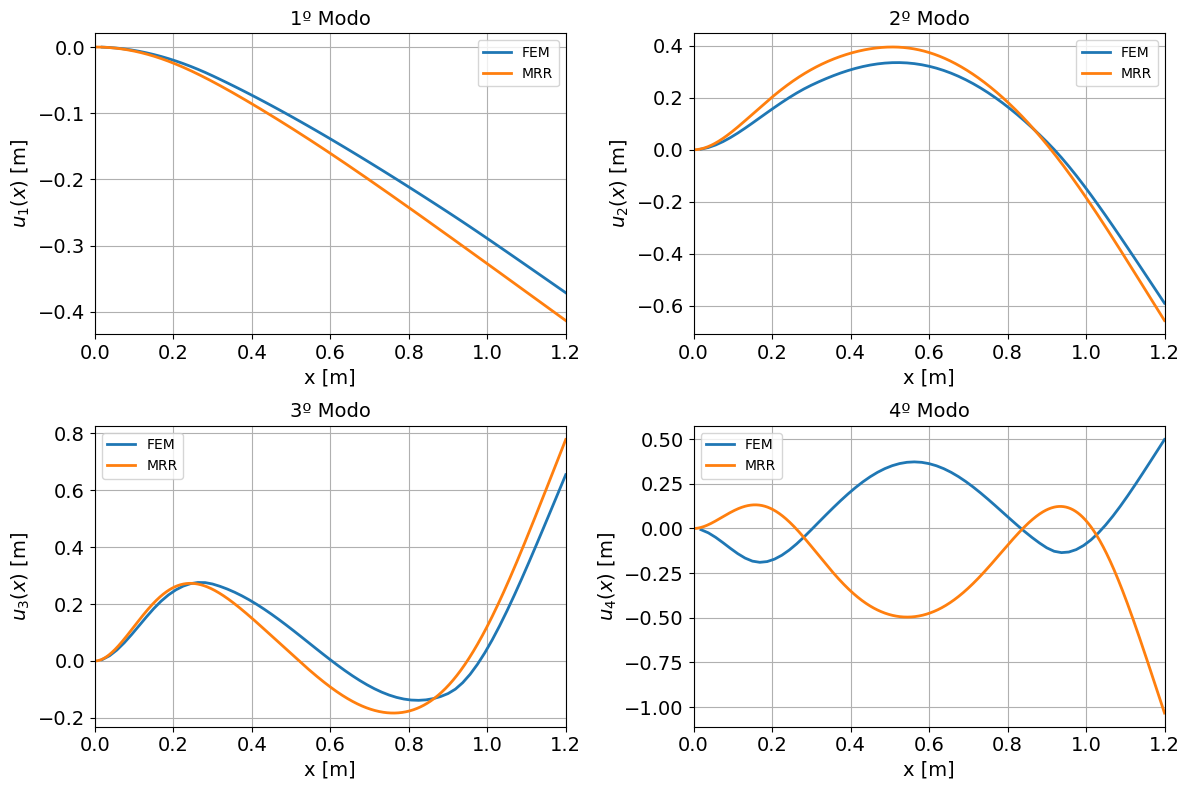

</div>

Já ao comparar as formas modais obtidas pelo MRR e FEM, notou-se uma boa concordância entre os 3 primeiros modos.

### Conclusão

Neste trabalha, foram implementados dois métodos numéricos para determinar as frequências naturais e modos de vibração de uma viga engastada: o Método de Rayleigh-Ritz (MRR) e o Método de Elementos Finitos (FEM). Ambas as implementações foram bem-sucedidas, demonstrando suas capacidades individuais.

No entanto, foi observada uma divergência entre as frequências naturais obtidas pelo MRR e pelo FEM. Uma possível razão para essa discrepância pode ser atribuída à implementação das integrais simbólicas para obter as matrizes de massa e rigidez. Essas divergências sugerem a necessidade de uma análise mais aprofundada das metodologias empregadas, a fim de compreender melhor o impacto dessas integrais simbólicas nos resultados.

Além disso, o FEM mostrou-se consideravelmente mais eficaz do que o MRR em termos de custo computacional. Enquanto o FEM exigiu apenas 3 segundos para executar a malha com 64 elementos, o MRR levou cerca de 30 minutos para obter as matrizes com 16 funções de base. Essa diferença de tempo destaca a vantagem do FEM em termos de eficiência computacional.

Outra vantagem do FEM sobre o MRR é a sua capacidade de obter automaticamente as funções de forma, eliminando a necessidade de conhecimento prévio sobre quais funções de base utilizar. Isso confere ao FEM uma maior flexibilidade e aplicabilidade em estruturas complexas, como vigas engastadas.

Em resumo, ambos os métodos, MRR e FEM, foram capazes de fornecer resultados satisfatórios para o estudo da viga engastada. No entanto, a divergência nas frequências naturais destaca a importância de uma análise mais detalhada das integrais simbólicas utilizadas. Além disso, o FEM demonstrou ser mais eficiente em termos de custo computacional e mais flexível em relação à seleção das funções de forma, tornando-o uma escolha mais viável para a análise de vigas engastadas e outras estruturas complexas.

## Implementação no Python

### Importando bibliotecas necessárias
- Será feito para ambas implementações do MRR e do FEM (Finite Element Method)

Serão utilizadas as bibliotecas:
- numpy: para operações matriciais;
- matplotlib: para plotar os gráficos;
- sympy: para realizar as integrais simbólicas;

In [1]:
import numpy as np
import sympy as sp
from scipy import linalg
import matplotlib.pyplot as plt

from IPython.display import display

### Definindo funções de base

O primeiro passo para uma integração simbolica é criar os simbolos que serão utilizados, o que é feito com `sp.symbols()`. \
Em seguida são definidos $\eta_j$, $D_j$ e $d_j$ (O mesmo também é feito para $\eta_k$, $D_k$ e $d_k$).

In [2]:
x, j, k = sp.symbols('x j k')
L = 1.2

eta_j = sp.Piecewise((1.875/L, sp.Eq(j, 1)), ((j-1/2)*sp.pi/L, j > 1)).evalf(4)
eta_k = sp.Piecewise((1.875/L, sp.Eq(k, 1)), ((k-1/2)*sp.pi/L, k > 1)).evalf(4)

D_j = (sp.cos(eta_j*L)+sp.cosh(eta_j*L))/(sp.sin(eta_j*L)-sp.sinh(eta_j*L))
D_k = (sp.cos(eta_k*L)+sp.cosh(eta_k*L))/(sp.sin(eta_k*L)-sp.sinh(eta_k*L))

d_j = sp.sin(eta_j*x) - sp.sinh(eta_j*x) + D_j*(sp.cos(eta_j*x) - sp.cosh(eta_j*x))
d_k = sp.sin(eta_k*x) - sp.sinh(eta_k*x) + D_k*(sp.cos(eta_k*x) - sp.cosh(eta_k*x))



### Obtenção das matris de rigidez e massa

Para obtenção das matrizes de massa e rigidez, é primeiro definido simbolicamente a área da seção transversal da viga, o momento de inércia da seção transversal da viga, o módulo de elasticidade da viga e a densidade da viga (também de forma simbolica variando com $x$).

In [3]:
A = sp.Piecewise((sp.pi* (0.03)**2 / 4, (x>=0) & (x<L/4)), (sp.pi* (0.05)**2 / 4,  (x>=L/4) & (x<3*L/4)), (sp.pi* (0.03)**2 / 4, (x>=3*L/4) & (x<=L)), (0, True))
rho = sp.Piecewise((7700, (x>=0) & (x<L/4)), (2700,  (x>=L/4) & (x<3*L/4)), (7700, (x>=3*L/4) & (x<=L)), (0, True))
E = sp.Piecewise((2.1e11, (x>=0) & (x<L/4)), (7.1e10,  (x>=L/4) & (x<3*L/4)), (2.1e11, (x>=3*L/4) & (x<=L)), (0, True))
I_z = sp.Piecewise(((sp.pi/4)*(0.03/2)**4, (x>=0) & (x<L/4)), ((sp.pi/4)*(0.05/2)**4,  (x>=L/4) & (x<3*L/4)), ((sp.pi/4)*(0.03/2)**4, (x>=3*L/4) & (x<=L)), (0, True))

Em seguida é definido simbolicamente como os termos Mjk e Kjk deverão ser calculados, e também são definidos o número de funções de base desejados `nfunc`, e os parâmetros referente as engrenagens e as molas de suspensão.

In [4]:
nfunc = 16
m_r = 8.5
J = 0.25 * m_r * 0.15**2

rotacional_eng = J*d_j.diff(x, 1).subs(x, L/8)*d_k.diff(x, 1).subs(x, L/8) + J*d_j.diff(x, 1).subs(x, 3*L/4)*d_k.diff(x, 1).subs(x, 3*L/4)
translacional_eng = m_r*d_j.subs(x, L/8)*d_k.subs(x, L/8) + m_r*d_j.subs(x, 3*L/4)*d_k.subs(x, 3*L/4)
M_jk = sp.Integral(rho*A*d_j*d_k, (x, 0, L)) + translacional_eng + rotacional_eng

k_mola = 10e3
molas = 2 * k_mola * (d_j.subs(x, L/4) * d_k.subs(x, L/4)) + 2 * k_mola * (d_j.subs(x, 3*L/4) * d_k.subs(x, 3*L/4))
K_jk = sp.Integral(E*I_z*sp.diff(d_j, x, 2)*sp.diff(d_k, x, 2), (x, 0, L)) +  molas

A seguir serão calculados os termos Mjk e Kjk e associados a cada linha j e coluna k. \
O método `.subs()` é utilizado para substituir os valores de j e k nas funções de base. \
O método `.doit()` é utilizado para que o SymPy realize a integração simbolica. \
O método `.evalf()` é utilizado para que o SymPy realize os cálculos numéricos finais, como substituir o valor de $\pi$ (após a integração simbólica). \
Em seguida as matrizes `M` e `K` obtidas são convertidas para `numpy.array` e são salvas no formato `.npy` para que possam ser utilizadas posteriormente (evitando precisar recalcular as matrizes a cada execução do código).

- Importante: Esse código pode levar algo em torno de 30 ~ 40 minutos para ser executado, pois estão sendo realizadas as integrações simbolicas.

In [222]:
M = sp.Matrix.zeros(nfunc, nfunc)
K = sp.Matrix.zeros(nfunc, nfunc)
for i in range(nfunc):
    for k_ in range(i+1):
            
        M[i, k_] = M_jk.subs({j: i+1, k: k_+1}).doit().evalf()
        K[i, k_] = K_jk.subs({j: i+1, k: k_+1}).doit().evalf()


M_array = np.array(M)
K_array = np.array(K)

# # Save the NumPy array to a file
np.save('mass_matrix_mrr.npy', M_array)
np.save('stiffness_matrix_mrr.npy', K_array)

Aqui são carregadas as matrizes de massa e rigidez obtidas anteriormente, e como a matriz é transposta, ou seja, $M^T=M$, os cálculos anteriores tinham sido realizados apenas para a matriz triangular inferior, e aqui é feito a simetrização da matriz.

In [11]:
M = np.load('mass_matrix_mrr.npy', allow_pickle=True)
K = np.load('stiffness_matrix_mrr.npy', allow_pickle=True)


for k in range(nfunc):
    for i in range(k+1):
        
        M[i, k] = M[k, i]
        K[i, k] = K[k, i]

M= sp.Matrix(M)
K= sp.Matrix(K)

Em seguida serão mostradas as matrizes obtidas, utilizando o método `evalf(n)` especificando o número de digitos `n` que serão mostrados por cada elemento da matriz.

In [235]:
M.evalf(5)

Matrix([
[    39.854,  3.1166, -16.367,   20.577,   -8.899, -4.6948,   19.269,  -21.495,   11.848,  2.1154, -19.727,  20.117,  -61.077,  -146.9,    2641.5, -2.0145e+6],
[    3.1166,  9.8416,  -1.345,    5.077,   7.7326, -3.0462,   8.1066,  0.76765,  -9.9332,   6.449, -13.856,  -9.395,   5.2422, -20.003,   -1401.3,     6.0105],
[   -16.367,  -1.345,  24.611,  -2.9401,   11.689,  18.495,  -8.7125,   12.264,   -3.218,  -21.73,  2.3685, -25.151,  -18.414, -343.04,   -21.663,     11.852],
[    20.577,   5.077, -2.9401,   33.087,   6.2651,  12.293,   22.464,  -11.879,   8.1619, -12.646, -28.575, -4.1343,  -35.457,  19.284,   -728.66,   -67600.0],
[    -8.899,  7.7326,  11.689,   6.2651,   37.436,  7.0133,   15.571,   21.745,  -23.243,  12.317,  -21.37, -38.592,   6.6683, -50.129,   -733.32,   -50671.0],
[   -4.6948, -3.0462,  18.495,   12.293,   7.0133,  45.074,   3.7478,   10.578,   30.862, -31.537,  11.834, -5.5696,  -64.215,  24.914,    689.19,    33768.0],
[    19.269,  8.1066, -8.7125, 

In [236]:
K.evalf(5)

Matrix([
[   2.304e+5,  -2.853e+5, -3.7896e+5,   3.3744e+5,  7.0653e+5,    1.264e+6,   7.1582e+5, -7.0463e+5,  -1.3604e+6,  -2.1568e+6,   -1.037e+6,   1.0735e+6,   7.4335e+8,   6.5483e+8,  4.5555e+10, -8.0065e+11],
[  -2.853e+5,  4.7655e+6, -1.0509e+6,  -4.7413e+6,  1.2232e+6,  -3.3899e+6,     1.71e+6,  5.1181e+6,  -2.5901e+6,   5.9663e+6,  -1.9985e+6,  -3.2591e+7,   4.5958e+6,  -9.5116e+6,   3.2237e+6,   7.2875e+6],
[ -3.7896e+5, -1.0509e+6,  3.6042e+7,  -1.1261e+6, -3.6602e+7,   2.7409e+6,  -1.0042e+7, -4.6725e+5,   5.0294e+7,  -5.6015e+6,   1.8176e+7,   1.2379e+6,  -6.6948e+8,   7.8726e+6,  6.9117e+10,  -2.2609e+6],
[  3.3744e+5, -4.7413e+6, -1.1261e+6,   1.2024e+8,  5.0994e+5,  -1.0336e+8,   2.1866e+6,  2.1287e+7,  -3.0165e+6,   1.1785e+8,   -3.249e+6,  -3.1591e+7,   5.0348e+6,  2.0154e+10,   -8.47e+11, -3.5834e+12],
[  7.0653e+5,  1.2232e+6, -3.6602e+7,   5.0994e+5,  3.3276e+8,   1.8673e+6,  -1.7973e+8,  4.1415e+5,   3.8355e+7,  -3.4232e+6,   1.2867e+8,   1.1459e+7,  -1.6179e+9,  

### Solução da equação do movimento via método modal

Em seguida é definido o número de funções de forma desejados em cada comparação (4, 6, 8, 10, 16). \
E são calculadas as frequencias naturais e os modos de vibração para cada número de funções de forma desejado.

In [13]:
M_array = np.array(M).astype(np.float64)
K_array = np.array(K).astype(np.float64)

n_funcoes = [4, 6, 8, 10, 12]

M_dict = {i: M_array[:i, :i] for i in n_funcoes}
K_dict = {i: K_array[:i, :i] for i in n_funcoes}
fn_dict = {}
a_dict = {}

for i in n_funcoes:
    # Autovalores e autovetores
    omega, a = linalg.eig(K_dict[i],M_dict[i])

    # Frequências naturais
    fn, ind = np.unique((np.sqrt(omega) / (2 * np.pi)).real, return_index=True)
    
    fn_dict[i] = fn

    # Ordenando os autovetores
    a = a[:, ind]

    # Normalização dos autovetores
    D = np.sqrt(np.diag(np.dot(a.T, np.dot(M_dict[i], a))))
    a = np.dot(a, np.diag(1/D))
    a_dict[i] = a

Abaixo são calculadas as autofunções para os quatro primeiros modos

In [14]:
u_x = sp.Matrix.zeros(4, 1)
nfun = 8

for i in range(4):
    aux = 0
    for k_ in range(nfun):
        aux += a_dict[nfun][k_, i] * d_j.subs({j: k_+1}).evalf()
    u_x[i, 0] = aux

Em seguida é plotado o gráfico de cada um dos 4 modos de vibração, assim como a frequência natural associada, considerando a utilização de 8 funções de base com o método de Rayleigh-Ritz.

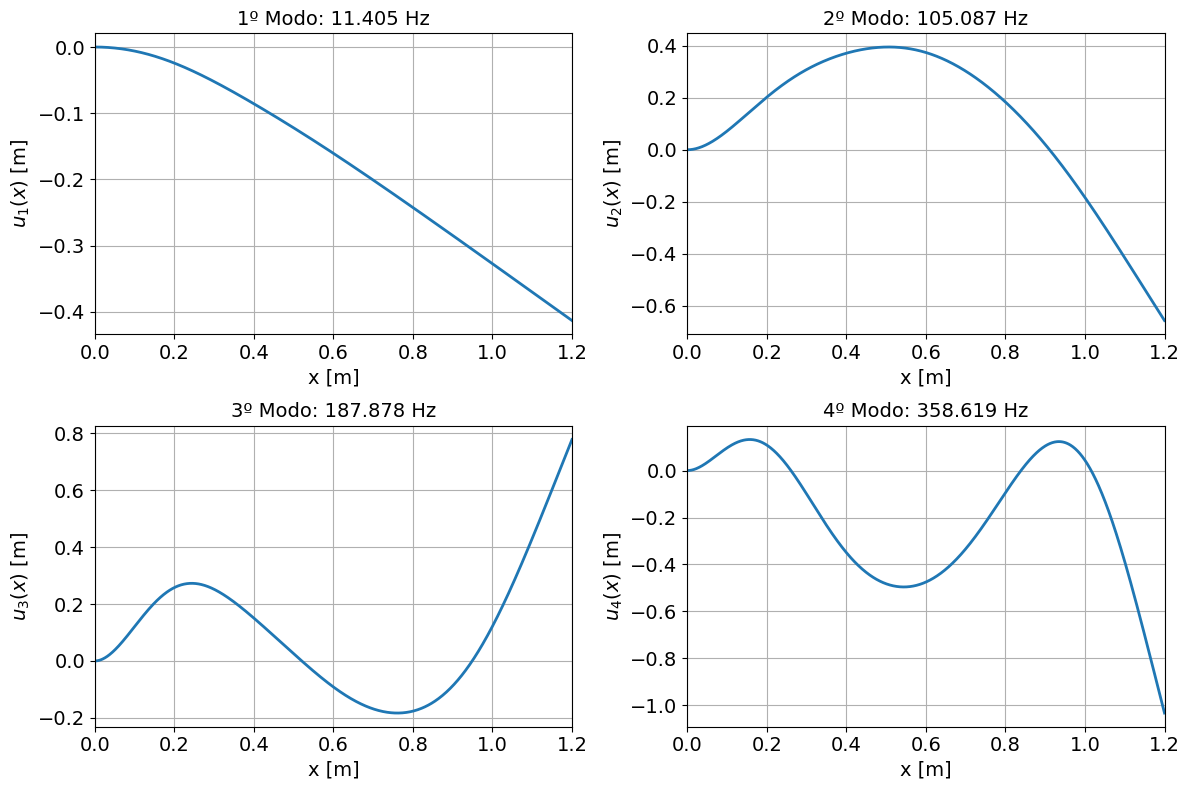

In [54]:
N=4
# Define the x-axis values

# Set the size and position of the figure
plt.figure(figsize=(12,8))
x_plot = np.linspace(0, L, 1000)

# Loop over each vibration mode
for k_ in range(1, N+1):

    # Create a subplot for the current mode
    plt.subplot(2, 2, k_)

    # Plot the vibration mode
    plt.plot(x_plot,sp.lambdify(x, u_x[k_-1], 'numpy')(x_plot).real, linewidth=2, markersize=8, markerfacecolor='b')

    # Add labels and titles
    plt.grid(True)
    plt.title(f"{k_}º Modo: {np.real(fn_dict[nfun][k_-1]):.3f} Hz", fontsize=14)
    plt.xlabel("x [m]", fontsize=14)
    plt.ylabel(fr"${{u}}_{k_}(x)$ [m]", fontsize=14)
    plt.xlim(0, L)

    # Set the tick labels
    plt.yticks(fontsize=14)
    
    # Set the tick label interpreter to latex
    plt.tick_params(labelsize=14)


# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Plot da convergência de $f_n$ em função do número de funções de base `nfunc` utilizadas.

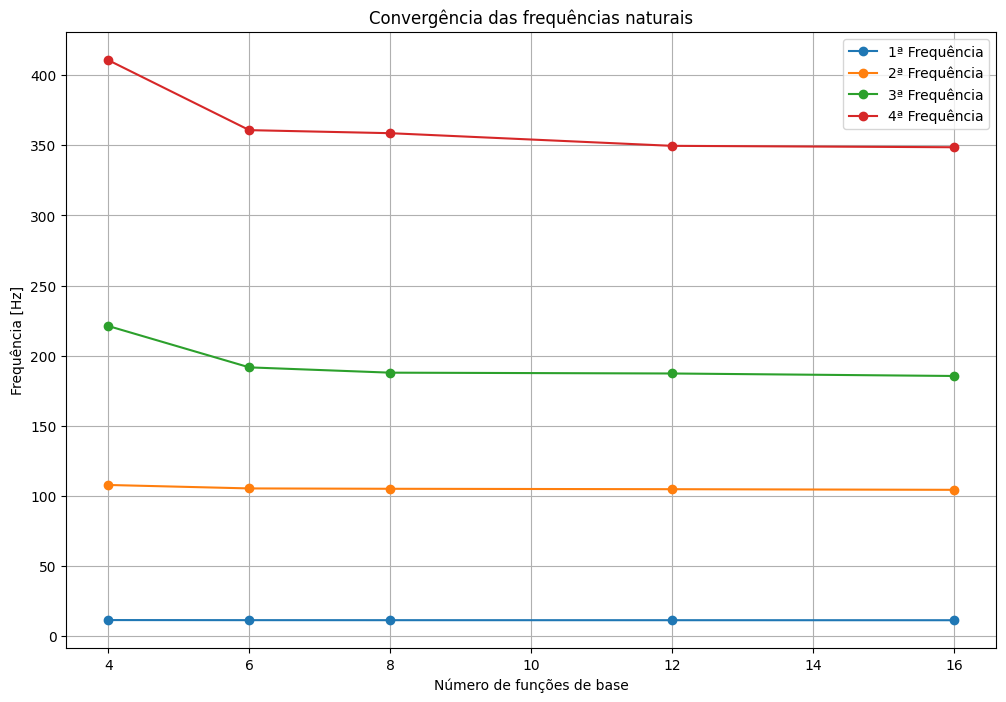

In [256]:
primeira_freq = []
segunda_freq = []
terceira_freq = []
quarta_freq = []

for i in n_funcoes:
    primeira_freq.append(np.real(fn_dict[i][0]))
    segunda_freq.append(np.real(fn_dict[i][1]))
    terceira_freq.append(np.real(fn_dict[i][2]))
    quarta_freq.append(np.real(fn_dict[i][3]))

plt.figure(figsize=(12,8))
plt.plot([4,6,8,12,16], primeira_freq, label='1ª Frequência', marker='o')
plt.plot([4,6,8,12,16], segunda_freq, label='2ª Frequência', marker='o')
plt.plot([4,6,8,12,16], terceira_freq, label='3ª Frequência', marker='o')
plt.plot([4,6,8,12,16], quarta_freq, label='4ª Frequência', marker='o')
plt.legend()
plt.grid()
plt.xlabel('Número de funções de base')
plt.ylabel('Frequência [Hz]')
plt.title("Convergência das frequências naturais")
plt.show()

### Método de Elementos Finitos (FEM)

Primeiramente é definido de forma simbólica o $\xi$ e o $a$ (tamanho do elemento), permitindo escrever o vetor $\eta(\xi)$ de funções de forma do elemento.

In [23]:
xi, a = sp.symbols('\\xi a')

eta = sp.Matrix([1/4*(2-3*xi+xi**3),
 a/4*(1-xi-xi**2+xi**3),
 1/4*(2+3*xi-xi**3),
 a/4*(-1-xi+xi**2+xi**3)])

num_elems = [8, 16, 64]
num_nos = [num_elem + 1 for num_elem in num_elems]
num_gls = [2 * nos for nos in num_nos]
tamanho_elem = [L / elem for elem in num_elems]
posicao_nos = [np.linspace(0, L, nos) for nos in num_nos]

Em seguida é implementado a obtenção da matriz de rigidez do elemento, e a matriz de massa do elemento, utilizando o método `subs()` para substituir os valores de $\xi$ e $a$ nas funções de forma.

In [25]:
nos_molas = [L/4, 3*L/4]
nos_eng = [L/8, 3*L/4]

# Viga engastada
gls_restritos = [0, 1]

Matrizes_massa = []
Matrizes_rigidez = []

# Primeiro loop para calcular as matrizes de massa e rigidez variando o número de elementos
for enum, num_elem in enumerate(num_elems):

    # Calcula as integrais de massa e rigidez para um elemento (tendo o tamanho do elemento definido)
    eta_num_elem = eta.subs(a, tamanho_elem[enum]/ 2)
    integral_massa  =  sp.integrate(eta_num_elem*eta_num_elem.T, (xi, -1, 1))
    integral_rigidez = sp.integrate(eta_num_elem.diff(xi, 2)*eta_num_elem.diff(xi, 2).T, (xi, -1, 1))

    # Define os graus de liberdade das engrenagens e das molas
    gl_engs = [int(np.argmin(np.abs(posicao_nos[enum] - no_eng))) * 2 for no_eng in nos_eng]
    gl_inercia = [gl + 1 for gl in gl_engs]
    gl_molas = [int(np.argmin(np.abs(posicao_nos[enum] - no_mola))) * 2 for no_mola in nos_molas]

    # Inicializa as matrizes globais de massa e rigidez
    M_global = sp.Matrix.zeros(num_gls[enum], num_gls[enum])
    K_global = sp.Matrix.zeros(num_gls[enum], num_gls[enum])

    # Faz um loop em cada elemento
    for elem in range(num_elem):
        # Define os nós do elemento
        nos_elem = np.linspace(0, L, num_elem+1)[elem:elem+2]
        # Inicializa as matrizes do elemento
        M_e = sp.Matrix.zeros(4, 4)
        K_e = sp.Matrix.zeros(4, 4)

        # Substitui as posicoes dos nós no elemento e calcula Rho, A, E e I_z
        rhoA_e = (rho * A).subs(x, nos_elem[0]) * tamanho_elem[enum]
        EIz_e = (E * I_z).subs(x, nos_elem[0]) / tamanho_elem[enum] ** 3

        # Calcula as matrizes de massa e rigidez do elemento
        M_e  = (rhoA_e * integral_massa).evalf() 
        K_e = (EIz_e * integral_rigidez).evalf()
        display(M_e)

        # Adiciona as matrizes do elemento nas matrizes globais
        M_global[2*elem:2*elem+4, 2*elem:2*elem+4] += M_e
        K_global[2*elem:2*elem+4, 2*elem:2*elem+4] += K_e

    M_global = np.array(M_global).astype(np.float64)
    K_global = np.array(K_global).astype(np.float64)

    # Adiciona as molas e inércias das engrenagens
    M_global[gl_engs, gl_engs] += m_r
    M_global[gl_inercia, gl_inercia] += J
    K_global[gl_molas, gl_molas] += 2*k_mola

    # Remove os graus de liberdade restritos
    M_global = np.delete(M_global, gls_restritos, axis=0)
    M_global = np.delete(M_global, gls_restritos, axis=1)
    K_global = np.delete(K_global, gls_restritos, axis=0)
    K_global = np.delete(K_global, gls_restritos, axis=1)

    Matrizes_massa.append(M_global)
    Matrizes_rigidez.append(K_global)    

Matrix([
[    0.60648446177551,    0.0128294789990973,   0.209936929076138,  -0.00758105577219387],
[  0.0128294789990973,  0.000349894881793563, 0.00758105577219387, -0.000262421161345172],
[   0.209936929076138,   0.00758105577219387,    0.60648446177551,   -0.0128294789990973],
[-0.00758105577219387, -0.000262421161345172, -0.0128294789990973,  0.000349894881793563]])

Matrix([
[    0.60648446177551,    0.0128294789990973,   0.209936929076138,  -0.00758105577219387],
[  0.0128294789990973,  0.000349894881793563, 0.00758105577219387, -0.000262421161345172],
[   0.209936929076138,   0.00758105577219387,    0.60648446177551,   -0.0128294789990973],
[-0.00758105577219387, -0.000262421161345172, -0.0128294789990973,  0.000349894881793563]])

Matrix([
[   0.590731618612509,    0.0124962457783415,   0.204484021827407,  -0.00738414523265637],
[  0.0124962457783415,  0.000340806703045678, 0.00738414523265637, -0.000255605027284259],
[   0.204484021827407,   0.00738414523265637,   0.590731618612509,   -0.0124962457783415],
[-0.00738414523265637, -0.000255605027284259, -0.0124962457783415,  0.000340806703045678]])

Matrix([
[   0.590731618612509,    0.0124962457783415,   0.204484021827407,  -0.00738414523265637],
[  0.0124962457783415,  0.000340806703045678, 0.00738414523265637, -0.000255605027284259],
[   0.204484021827407,   0.00738414523265637,   0.590731618612509,   -0.0124962457783415],
[-0.00738414523265637, -0.000255605027284259, -0.0124962457783415,  0.000340806703045678]])

Matrix([
[   0.590731618612509,    0.0124962457783415,   0.204484021827407,  -0.00738414523265637],
[  0.0124962457783415,  0.000340806703045678, 0.00738414523265637, -0.000255605027284259],
[   0.204484021827407,   0.00738414523265637,   0.590731618612509,   -0.0124962457783415],
[-0.00738414523265637, -0.000255605027284259, -0.0124962457783415,  0.000340806703045678]])

Matrix([
[   0.590731618612509,    0.0124962457783415,   0.204484021827407,  -0.00738414523265637],
[  0.0124962457783415,  0.000340806703045678, 0.00738414523265637, -0.000255605027284259],
[   0.204484021827407,   0.00738414523265637,   0.590731618612509,   -0.0124962457783415],
[-0.00738414523265637, -0.000255605027284259, -0.0124962457783415,  0.000340806703045678]])

Matrix([
[    0.60648446177551,    0.0128294789990973,   0.209936929076138,  -0.00758105577219387],
[  0.0128294789990973,  0.000349894881793563, 0.00758105577219387, -0.000262421161345172],
[   0.209936929076138,   0.00758105577219387,    0.60648446177551,   -0.0128294789990973],
[-0.00758105577219387, -0.000262421161345172, -0.0128294789990973,  0.000349894881793563]])

Matrix([
[    0.60648446177551,    0.0128294789990973,   0.209936929076138,  -0.00758105577219387],
[  0.0128294789990973,  0.000349894881793563, 0.00758105577219387, -0.000262421161345172],
[   0.209936929076138,   0.00758105577219387,    0.60648446177551,   -0.0128294789990973],
[-0.00758105577219387, -0.000262421161345172, -0.0128294789990973,  0.000349894881793563]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.295365809306255,  0.00312406144458539,    0.102242010913704, -0.00184603630816409],
[ 0.00312406144458539,  4.26008378807098e-5,  0.00184603630816409, -3.19506284105324e-5],
[   0.102242010913704,  0.00184603630816409,    0.295365809306255, -0.00312406144458539],
[-0.00184603630816409, -3.19506284105324e-5, -0.00312406144458539,  4.26008378807098e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.303242230887755,  0.00320736974977433,    0.104968464538069, -0.00189526394304847],
[ 0.00320736974977433,  4.37368602241954e-5,  0.00189526394304847, -3.28026451681465e-5],
[   0.104968464538069,  0.00189526394304847,    0.303242230887755, -0.00320736974977433],
[-0.00189526394304847, -3.28026451681465e-5, -0.00320736974977433,  4.37368602241954e-5]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0738414523265637, 0.000195253840286587,    0.0255605027284259, -0.000115377269260256],
[ 0.000195253840286587,  6.65638091886091e-7,  0.000115377269260256,  -4.99228568914568e-7],
[   0.0255605027284259, 0.000115377269260256,    0.0738414523265637, -0.000195253840286587],
[-0.000115377269260256, -4.99228568914568e-7, -0.000195253840286587,   6.65638091886091e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

Matrix([
[   0.0758105577219387, 0.000200460609360896,    0.0262421161345172, -0.000118453996440529],
[ 0.000200460609360896,  6.83388441003053e-7,  0.000118453996440529,   -5.1254133075229e-7],
[   0.0262421161345172, 0.000118453996440529,    0.0758105577219387, -0.000200460609360896],
[-0.000118453996440529,  -5.1254133075229e-7, -0.000200460609360896,   6.83388441003053e-7]])

In [19]:
sp.Matrix(Matrizes_massa[1])

Matrix([
[     0.60648446177551, -8.67361737988404e-19,     0.104968464538069,  -0.00189526394304847,                     0,                     0,                    0,                    0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                    0,                    0,                     0,                     0,                     0,                     0,                     0,                     0,                    0,                    0],
[-8.67361737988404e-19,   8.74737204483908e-5,   0.00189526394304847,  -3.28026451681465e-5,                     0,                     0,                    0,                    0,                     0,                     0,                     0,        

A partir das matrizes globais é resolvido o problema de Autovalor, como feito anteriormente no MRR.

In [8]:
fem_fn = []
fem_a = []

for enum in range(len(num_elems)):
    # Autovalores e autovetores
    omega, a = linalg.eig(Matrizes_rigidez[enum],Matrizes_massa[enum])

    # Frequências naturais
    fn, ind = np.unique((np.sqrt(omega) / (2 * np.pi)).real, return_index=True)
    # Ordenando os autovetores
    a = a[:, ind]

    # Normalização dos autovetores
    D = np.sqrt(np.diag(np.dot(a.T, np.dot(Matrizes_massa[enum], a))))
    a = np.dot(a, np.diag(1/D))

    fem_fn.append(fn)
    fem_a.append(a)

Em sequência é plotado a convergência de $f_n$ em função do número de elementos utilizados.

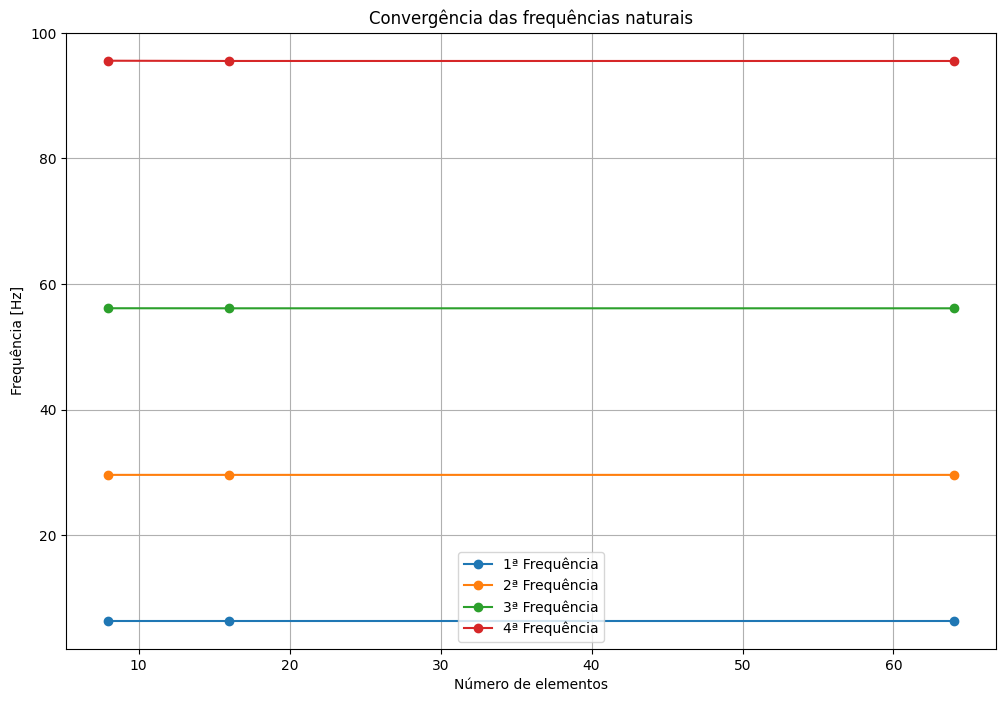

In [9]:
primeira_freq = [fn[0] for fn in fem_fn]
segunda_freq = [fn[1] for fn in fem_fn]
terceira_freq = [fn[2] for fn in fem_fn]
quarta_freq = [fn[3] for fn in fem_fn]


plt.figure(figsize=(12,8))
plt.plot(num_elems, primeira_freq, label='1ª Frequência', marker='o')
plt.plot(num_elems, segunda_freq, label='2ª Frequência', marker='o')
plt.plot(num_elems, terceira_freq, label='3ª Frequência', marker='o')
plt.plot(num_elems, quarta_freq, label='4ª Frequência', marker='o')
plt.legend()
plt.grid()
plt.xlabel('Número de elementos')
plt.ylabel('Frequência [Hz]')
plt.title("Convergência das frequências naturais")
plt.show()

A seguir serão plotados os 4 primeiros modos de vibração, comparando com os resultados obtidos pelo MRR.

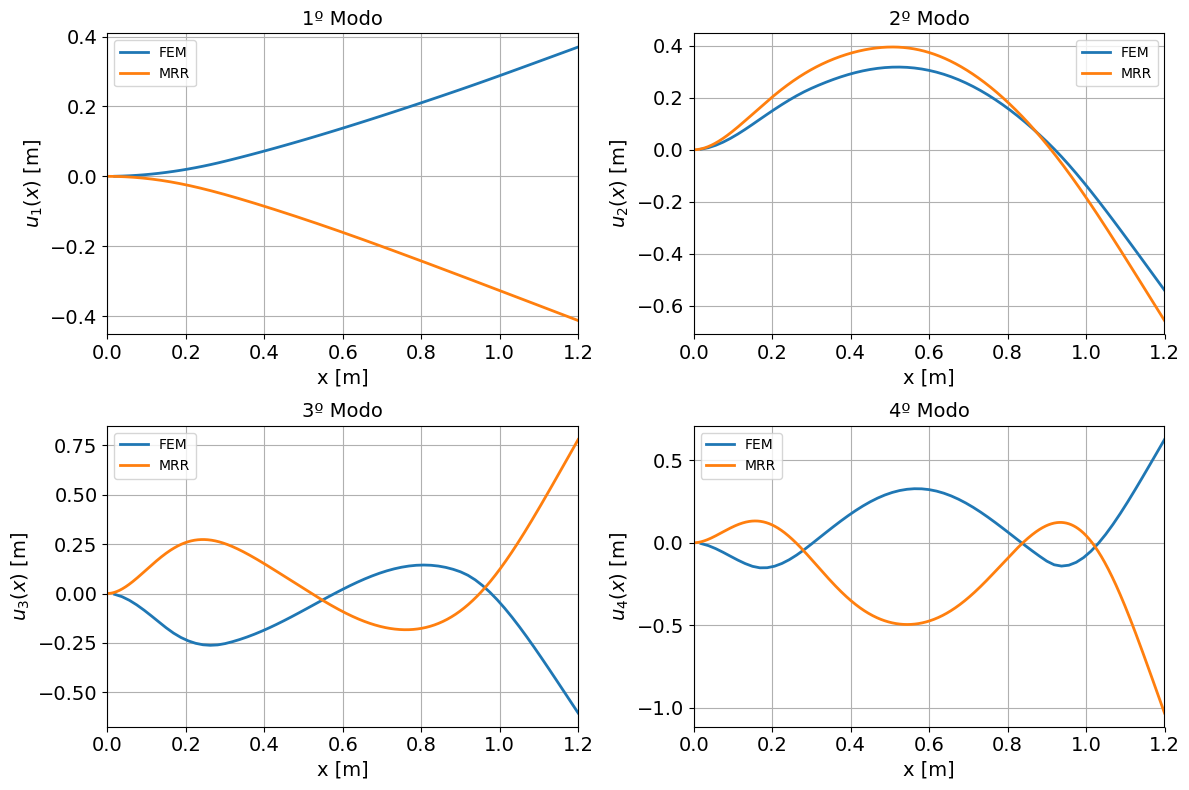

In [15]:
N=4
# Define the x-axis values

# Set the size and position of the figure
plt.figure(figsize=(12,8))
x_plot = np.arange(0, L+tamanho_elem[-1], tamanho_elem[-1])[1:]
x_plot_mrr = np.linspace(0, L, 1000)

# Loop over each vibration mode
for k_ in range(1, N+1):

    # Create a subplot for the current mode
    plt.subplot(2, 2, k_)

    # Plot the vibration mode
    plt.plot(x_plot,fem_a[-1][0:-1:2, :][:, k_-1], linewidth=2, markersize=8, markerfacecolor='b', label="FEM")
    plt.plot(x_plot_mrr,sp.lambdify(x, u_x[k_-1], 'numpy')(x_plot_mrr).real, linewidth=2, markersize=8, markerfacecolor='b', label="MRR")

    # Add labels and titles
    plt.grid(True)
    plt.title(f"{k_}º Modo", fontsize=14)
    plt.xlabel("x [m]", fontsize=14)
    plt.ylabel(fr"${{u}}_{k_}(x)$ [m]", fontsize=14)
    plt.xlim(0, L)
    plt.legend()

    # Set the tick labels
    plt.yticks(fontsize=14)
    
    # Set the tick label interpreter to latex
    plt.tick_params(labelsize=14)


# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()